In [1]:
# -*- coding: utf-8 -*-
"""
Created on thus 29 15:31:44 2024
@author: Clara Castilho Oliveira
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import freqcol_0_6 as fc
import pyigrf_clara_0_6 as igrf
import conductivity0_9_5 as cond
#from pathlib import Path

In [2]:
import irinetcdf_02 as iri
import msise2Netcdf as msise

## Lendo Dados

### IRI

In [5]:
namefileiri = "IRI.3D.2008001.nc"
iriteste = iri.irincdf(namefileiri)

In [6]:
iriteste.iridata.data

Ne          Tn           Ti  \
time            ht     lat   lon                                            
0 days 00:00:00 100.0  -90.0 0.0    2.306559e+10  213.050232   213.050232   
                             5.0    2.306561e+10  213.050232   213.050232   
                             10.0   2.306563e+10  213.050232   213.050232   
                             15.0   2.306566e+10  213.050232   213.050232   
                             20.0   2.306569e+10  213.050232   213.050232   
...                                          ...         ...          ...   
0 days 23:45:00 1000.0  90.0 340.0  8.990663e+09  668.046387  3207.315918   
                             345.0  8.990667e+09  668.046387  3207.315918   
                             350.0  8.990667e+09  668.046387  3207.315918   
                             355.0  8.990667e+09  668.046387  3207.315918   
                             360.0  8.990658e+09  668.046387  3207.315918   

                                             Te           O+            H+  \
time            ht     lat   lon                                             
0 days 00:00:00 100.0  -90.0 0.0     213.050232          0.0  0.000000e+00   
                             5.0     213.050232          0.0  0.000000e+00   
                             10.0    213.050232          0.0  0.000000e+00   
                             15.0    213.050232          0.0  0.000000e+00   
                             20.0    213.050232          0.0  0.000000e+00   
...                                         ...          ...           ...   
0 days 23:45:00 1000.0  90.0 340.0  3330.722900  778916800.0  7.537910e+09   
                             345.0  3330.723389  778917184.0  7.537913e+09   
                             350.0  3330.723389  778917184.0  7.537913e+09   
                             355.0  3330.723389  778917184.0  7.537913e+09   
                             360.0  3330.723389  778916416.0  7.537906e+09   

                                            He+           O2+           NO+  \
time            ht     lat   lon                                              
0 days 00:00:00 100.0  -90.0 0.0            0.0  3.690494e+09  1.937509e+10   
                             5.0            0.0  3.690498e+09  1.937511e+10   
                             10.0           0.0  3.690501e+09  1.937513e+10   
                             15.0           0.0  3.690505e+09  1.937515e+10   
                             20.0           0.0  3.690510e+09  1.937518e+10   
...                                         ...           ...           ...   
0 days 23:45:00 1000.0  90.0 340.0  233008832.0  0.000000e+00  0.000000e+00   
                             345.0  233008944.0  0.000000e+00  0.000000e+00   
                             350.0  233008944.0  0.000000e+00  0.000000e+00   
                             355.0  233008944.0  0.000000e+00  0.000000e+00   
                             360.0  233008720.0  0.000000e+00  0.000000e+00   

                                             N+  
time            ht     lat   lon                 
0 days 00:00:00 100.0  -90.0 0.0            0.0  
                             5.0            0.0  
                             10.0           0.0  
                             15.0           0.0  
                             20.0           0.0  
...                                         ...  
0 days 23:45:00 1000.0  90.0 340.0  440826912.0  
                             345.0  440827104.0  
                             350.0  440827104.0  
                             355.0  440827104.0  
                             360.0  440826688.0  

[11927616 rows x 10 columns]

### IGRF

In [8]:
#resIGRF = "igrf2008_global" #result from a previous run of pyigrf
resIGRF = "teste2024"
dado = igrf.IGRF(-80,-180,100,2008,resIGRF + '_2') #preciso garantir que estão nas mesmas coordenadas

#calcigrf = dado.calc_grid(intervalo_h = 20, lim_h = 500, intervalo_lat=10, lim_lat=90, intervalo_lon=20, lim_lon=180)
calcigrf = dado.get_grid(resIGRF + '_2' + "_grid.csv")

# print(calcigrf["B(T)"],
#       calcigrf["Altitude"],
#       calcigrf["Latitude"],
#       calcigrf["Longitude"])

dado.Dfgrid['Longitude'] = 180 + dado.Dfgrid['Longitude'] #so it will be from 0 to 360 instead
dado.Dfgrid = dado.going_to_multiindex(dado.Dfgrid)
dado.Dfgrid.index.names = ['ht','lat','lon'] #putting the same index names as the rest of the data to allow join operations

print("\nFeito\n")


Feito



In [9]:
calcigrf

,Unnamed: 0,Altitude,Latitude,Longitude,Year,Declination,Inclination,Horizontal_intensity,Total_intensity,North_component,East_component,Vertical_component,DeclinationSV,InclinationSV,HorizontalSV,TotalSV,NorthSV,EastSV,VerticalSV,B(T)
0,0,100.0,-80.0,0.0,2008.0,130.650016,-78.987166,11153.322641,58385.533834,-7265.684471,8462.058561,-57310.330265,7.565173,23.511294,-2.036640,-55.740408,2.966179,33.745822,61.298534,0.000058
20,20,100.0,-80.0,20.0,2008.0,106.832854,-77.322789,12548.832156,57180.974298,-3633.899525,12011.159924,-55787.011330,5.615294,21.136468,-2.159970,-64.558690,13.271634,26.201494,70.856212,0.000057
40,40,100.0,-80.0,40.0,2008.0,87.026928,-75.185835,14180.630634,55461.381823,735.501253,14161.543811,-53617.856993,4.590182,15.354725,-2.143847,-71.804833,19.586268,14.433508,78.266974,0.000055
60,60,100.0,-80.0,60.0,2008.0,69.730176,-72.863350,15728.937435,53381.467651,5449.158841,14754.868375,-51011.583153,4.127284,7.858206,-2.031942,-76.598795,20.406969,0.912661,82.521167,0.000053
80,80,100.0,-80.0,80.0,2008.0,53.741100,-70.617133,16968.620205,51128.926759,10035.834357,13682.693464,-48231.038553,3.905295,0.255534,-1.861014,-78.676176,15.731993,-11.140570,83.444958,0.000051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6039,6039,480.0,80.0,260.0,2008.0,26.928769,85.899230,3363.957000,47041.207223,2999.203974,1523.477017,46920.773334,-12.645057,-17.248497,-1.352706,16.417433,-21.028600,3.625261,17.717959,0.000047
6059,6059,480.0,80.0,280.0,2008.0,17.599779,86.719411,2714.139287,47428.592018,2587.095402,820.664031,47350.868934,-5.168718,-18.494874,-1.408763,15.210789,-18.895528,-1.536047,16.319741,0.000047
6079,6079,480.0,80.0,300.0,2008.0,2.255246,86.684425,2749.034163,47532.032913,2746.904865,108.178074,47452.470578,4.522190,-18.096894,-1.379291,15.615055,-17.919926,-4.469040,16.712560,0.000048
6099,6099,480.0,80.0,320.0,2008.0,-3.066547,86.030108,3281.614189,47400.070928,3276.915161,-175.552581,47286.337692,10.163273,-18.601436,-1.444658,17.675767,-19.021940,-9.028981,19.034244,0.000047


### NRLMSISE 2 

In [11]:
filenamemsise2 = "NRLMSIS2.0.3D.2008001.nc"
msisetest = msise.nrlmsisenetcdf(filenamemsise2)

In [12]:
#msisetest.msise.data

## Calculating Conductivities

### Calculating colision frequencies

In [15]:
freqc = fc.freqcol(msisetest.msise.data["N2"],
            msisetest.msise.data["O2"],
            msisetest.msise.data["O"],
            iriteste.iridata.data['Te'],
            iriteste.iridata.data['Tn'],
            iriteste.iridata.data['Ti'])


Calculating Collision Frequency...
Done Tr...
Done fen...
Done fin1...
Done fin2...
All done


In [16]:
freqc.resul

fen          fin1  fin2
time            ht     lat   lon                           
0 days 00:00:00 0.0    -90.0 0.0    NaN  6.566674e+09   NaN
                             20.0   NaN  6.566674e+09   NaN
                             40.0   NaN  6.566674e+09   NaN
                             60.0   NaN  6.566674e+09   NaN
                             80.0   NaN  6.566674e+09   NaN
...                                 ...           ...   ...
0 days 23:45:00 1000.0  90.0 340.0  NaN           NaN   NaN
                             345.0  NaN           NaN   NaN
                             350.0  NaN           NaN   NaN
                             355.0  NaN           NaN   NaN
                             360.0  NaN           NaN   NaN

[17326656 rows x 3 columns]

### Calculating Angular Gyrofrequency

In [18]:
gyrofreq = cond.gyrofrequency(dado.Dfgrid["B(T)"])

calculando as freqcol all: start 
Done


In [19]:
gyrofreq.result

we         wi1         wi2
ht    lat   lon                                        
100.0 -80.0 0.0    1.026896e+07  184.686988  352.066087
            20.0   1.005710e+07  180.876687  344.802566
            40.0   9.754655e+06  175.437217  334.433385
            60.0   9.388836e+06  168.857966  321.891455
            80.0   8.992655e+06  161.732656  308.308583
...                         ...         ...         ...
480.0  80.0 260.0  8.273699e+06  148.802251  283.659542
            280.0  8.341833e+06  150.027639  285.995481
            300.0  8.360026e+06  150.354847  286.619232
            320.0  8.336816e+06  149.937420  285.823498
            340.0  8.297310e+06  149.226893  284.469029

[6120 rows x 3 columns]

### Calculating Relative Contruibution Parammeter

In [21]:
conductivity = cond.condiono_adachi()
conductivity.calc_prelativa_all(iriteste.iridata.data["O+"],
                        iriteste.iridata.data["NO+"],
                        iriteste.iridata.data["O2+"],
                        iriteste.iridata.data["Ne"])

Calculating relative contribution parameters...
Done


(time             ht      lat    lon  
 0 days 00:00:00  100.0   -90.0  0.0      4.335463e-11
                                 5.0      4.335458e-11
                                 10.0     4.335455e-11
                                 15.0     4.335449e-11
                                 20.0     4.335444e-11
                                              ...     
 0 days 23:45:00  1000.0   90.0  340.0    0.000000e+00
                                 345.0    0.000000e+00
                                 350.0    0.000000e+00
                                 355.0    0.000000e+00
                                 360.0    0.000000e+00
 Length: 11927616, dtype: float32,
 time             ht      lat    lon  
 0 days 00:00:00  100.0   -90.0  0.0      0.000000e+00
                                 5.0      0.000000e+00
                                 10.0     0.000000e+00
                                 15.0     0.000000e+00
                                 20.0     0.000000e+00
       

In [22]:
#conductivity.agirofreq

In [23]:
#Alining Data by putting everything in a same Data Frame
conductivity.calcvaluesdf = gyrofreq.result.join(freqc.resul.copy(),
                          how = 'inner') #inner para ficarem só as coordenadas que ambos dataframes tem


In [24]:
conductivity.calcvaluesdf = conductivity.calcvaluesdf.reset_index().sort_values(['time','ht','lat','lon']).set_index(['time','ht','lat','lon'])

### Hall and Pedersen Conductivities

In [56]:
def calc_Hall(fen,fin1,fin2,wi1,wi2,we,p1,p2,ne,B):
        """
        CALCULA A CONDUTIVIDADE DE HALL APARTIR DAS EQUAÇÕES DE Adachi et al.
        Earth, Planets and Space (2017).

        Parameters
        ----------
        fen : PANDA SERIES
            frequência de colisão dos elétrons com as partículas neutras [Hz].
        fin1 : PANDA SERIES
            frequência de colisão do íon 1 com as partículas neutras [Hz].
        fin2 : PANDA SERIES
            frequência de colisão do íon 2 com as partículas neutras [Hz].
        wi1 : PANDA SERIES
            girofrequência do íon 1 [Hz].
        wi2 : PANDA SERIES
            girofrequência do íon 2 [Hz].
        we : PANDA SERIES
            girofrequência do elétron [Hz].
        p1 : TYPE
            DESCRIPTION.
        p2 : TYPE
            DESCRIPTION.
        ne : TYPE
            densidade de elétrons em [m^-3].
        B : TYPE
            intensidade do campo magnético da Terra [T].

        Returns
        -------
        self.condH : TYPE
            DESCRIPTION.

        """         
        print("\nCalculando a Condutividade de Hall...")
        e = -1.602177e-19 #Carga do elétron [C]
        d = 0
        soma = 0
        
        a1 = wi2**2/(wi2**2 + fin2**2)
        #print("\na1",a1)
        b1 = (wi1**2)/(wi1**2 + fin1**2)
        #print("\nb1",b1)
        c1 = (we**2)/(we**2 + fen**2)
        #print("\nc1",c1)

        soma = c1 - (p1 * b1) - (p2 * a1)
        print("\n soma",soma)
        d = (ne * np.sqrt(e**2))/B
        print('\nne e^2 ',ne*np.sqrt(e**2))    
        print('\nd',d)
    
        CondH  = d * soma
        print("Done")
    
        return CondH

In [59]:
conductivity.calcvaluesdf= conductivity.calcvaluesdf.join(dado.Dfgrid["B(T)"].copy(),
                          how = 'inner') #inner para ficarem só as coordenadas que ambos dataframes tem

In [61]:
conductivity.calcvaluesdf

we         wi1         wi2  \
ht    lat   lon   time                                                    
100.0 -80.0 0.0   0 days 00:00:00  1.026896e+07  184.686988  352.066087   
                  0 days 00:15:00  1.026896e+07  184.686988  352.066087   
                  0 days 00:30:00  1.026896e+07  184.686988  352.066087   
                  0 days 00:45:00  1.026896e+07  184.686988  352.066087   
                  0 days 01:00:00  1.026896e+07  184.686988  352.066087   
...                                         ...         ...         ...   
480.0  80.0 340.0 0 days 22:45:00  8.297310e+06  149.226893  284.469029   
                  0 days 23:00:00  8.297310e+06  149.226893  284.469029   
                  0 days 23:15:00  8.297310e+06  149.226893  284.469029   
                  0 days 23:30:00  8.297310e+06  149.226893  284.469029   
                  0 days 23:45:00  8.297310e+06  149.226893  284.469029   

                                            fen         fin1         fin2  \
ht    lat   lon   time                                                      
100.0 -80.0 0.0   0 days 00:00:00  10630.684494  1153.247628  1830.061777   
                  0 days 00:15:00  10642.258631  1153.247628  1830.075877   
                  0 days 00:30:00  10651.714636  1153.247628  1830.087391   
                  0 days 00:45:00  10658.917005  1153.247628  1830.096155   
                  0 days 01:00:00  10663.769088  1153.247628  1830.102060   
...                                         ...          ...          ...   
480.0  80.0 340.0 0 days 22:45:00      0.000140     0.000409     0.001297   
                  0 days 23:00:00      0.000141     0.000409     0.001297   
                  0 days 23:15:00      0.000142     0.000409     0.001296   
                  0 days 23:30:00      0.000143     0.000409     0.001296   
                  0 days 23:45:00      0.000144     0.000409     0.001295   

                                       B(T)  
ht    lat   lon   time                       
100.0 -80.0 0.0   0 days 00:00:00  0.000058  
                  0 days 00:15:00  0.000058  
                  0 days 00:30:00  0.000058  
                  0 days 00:45:00  0.000058  
                  0 days 01:00:00  0.000058  
...                                     ...  
480.0  80.0 340.0 0 days 22:45:00  0.000047  
                  0 days 23:00:00  0.000047  
                  0 days 23:15:00  0.000047  
                  0 days 23:30:00  0.000047  
                  0 days 23:45:00  0.000047  

[587520 rows x 7 columns]

#### Hall

In [55]:
calc_Hall(conductivity.calcvaluesdf["fen"],
                       conductivity.calcvaluesdf["fin1"],
                       conductivity.calcvaluesdf["fin2"], 
                       conductivity.calcvaluesdf['wi1'],
                       conductivity.calcvaluesdf['wi2'],
                       conductivity.calcvaluesdf['we'],
                       conductivity.p1,
                       conductivity.p2,
                       iriteste.iridata.data['Ne'],
                       dado.Dfgrid["B(T)"]).dropna()


Calculando a Condutividade de Hall...

a1 time             ht     lat    lon  
0 days 00:00:00  100.0  -80.0  0.0      0.035689
                               20.0     0.034939
                               40.0     0.033597
                               60.0     0.031798
                               80.0     0.029704
                                          ...   
0 days 23:45:00  480.0   80.0  260.0    1.000000
                               280.0    1.000000
                               300.0    1.000000
                               320.0    1.000000
                               340.0    1.000000
Length: 587520, dtype: float64

b1 time             ht     lat    lon  
0 days 00:00:00  100.0  -80.0  0.0      0.025005
                               20.0     0.024475
                               40.0     0.023524
                               60.0     0.022250
                               80.0     0.020769
                                          ...   
0 days 23:45:00

ht     lat    lon    time           
100.0  -80.0  0.0    0 days 00:00:00    0.000119
                     0 days 00:15:00    0.000119
                     0 days 00:30:00    0.000119
                     0 days 00:45:00    0.000119
                     0 days 01:00:00    0.000120
                                          ...   
480.0   80.0  340.0  0 days 22:45:00    0.000265
                     0 days 23:00:00    0.000268
                     0 days 23:15:00    0.000270
                     0 days 23:30:00    0.000273
                     0 days 23:45:00    0.000275
Length: 587520, dtype: float64

#### Pedersen

In [30]:
conductivity.calc_Pedersen(conductivity.calcvaluesdf["fen"],
                       conductivity.calcvaluesdf["fin1"],
                       conductivity.calcvaluesdf["fin2"], 
                       conductivity.calcvaluesdf['wi1'],
                       conductivity.calcvaluesdf['wi2'],
                       conductivity.calcvaluesdf['we'],
                       conductivity.p1,
                       conductivity.p2,
                       iriteste.iridata.data['Ne'],
                       dado.Dfgrid["B(T)"]).dropna()

===== Calculando a condutividade de Pedersen =====
Done


ht     lat    lon    time           
100.0  -80.0  0.0    0 days 00:00:00    1.227699e-07
                     0 days 00:15:00    1.229439e-07
                     0 days 00:30:00    1.232755e-07
                     0 days 00:45:00    1.237615e-07
                     0 days 01:00:00    1.243970e-07
                                            ...     
480.0   80.0  340.0  0 days 22:45:00    4.459838e-15
                     0 days 23:00:00    4.535907e-15
                     0 days 23:15:00    4.615148e-15
                     0 days 23:30:00    4.695789e-15
                     0 days 23:45:00    4.776177e-15
Length: 587520, dtype: float64

## Plotting

In [32]:
gyrofreq.result

we         wi1         wi2
ht    lat   lon                                        
100.0 -80.0 0.0    1.026896e+07  184.686988  352.066087
            20.0   1.005710e+07  180.876687  344.802566
            40.0   9.754655e+06  175.437217  334.433385
            60.0   9.388836e+06  168.857966  321.891455
            80.0   8.992655e+06  161.732656  308.308583
...                         ...         ...         ...
480.0  80.0 260.0  8.273699e+06  148.802251  283.659542
            280.0  8.341833e+06  150.027639  285.995481
            300.0  8.360026e+06  150.354847  286.619232
            320.0  8.336816e+06  149.937420  285.823498
            340.0  8.297310e+06  149.226893  284.469029

[6120 rows x 3 columns]

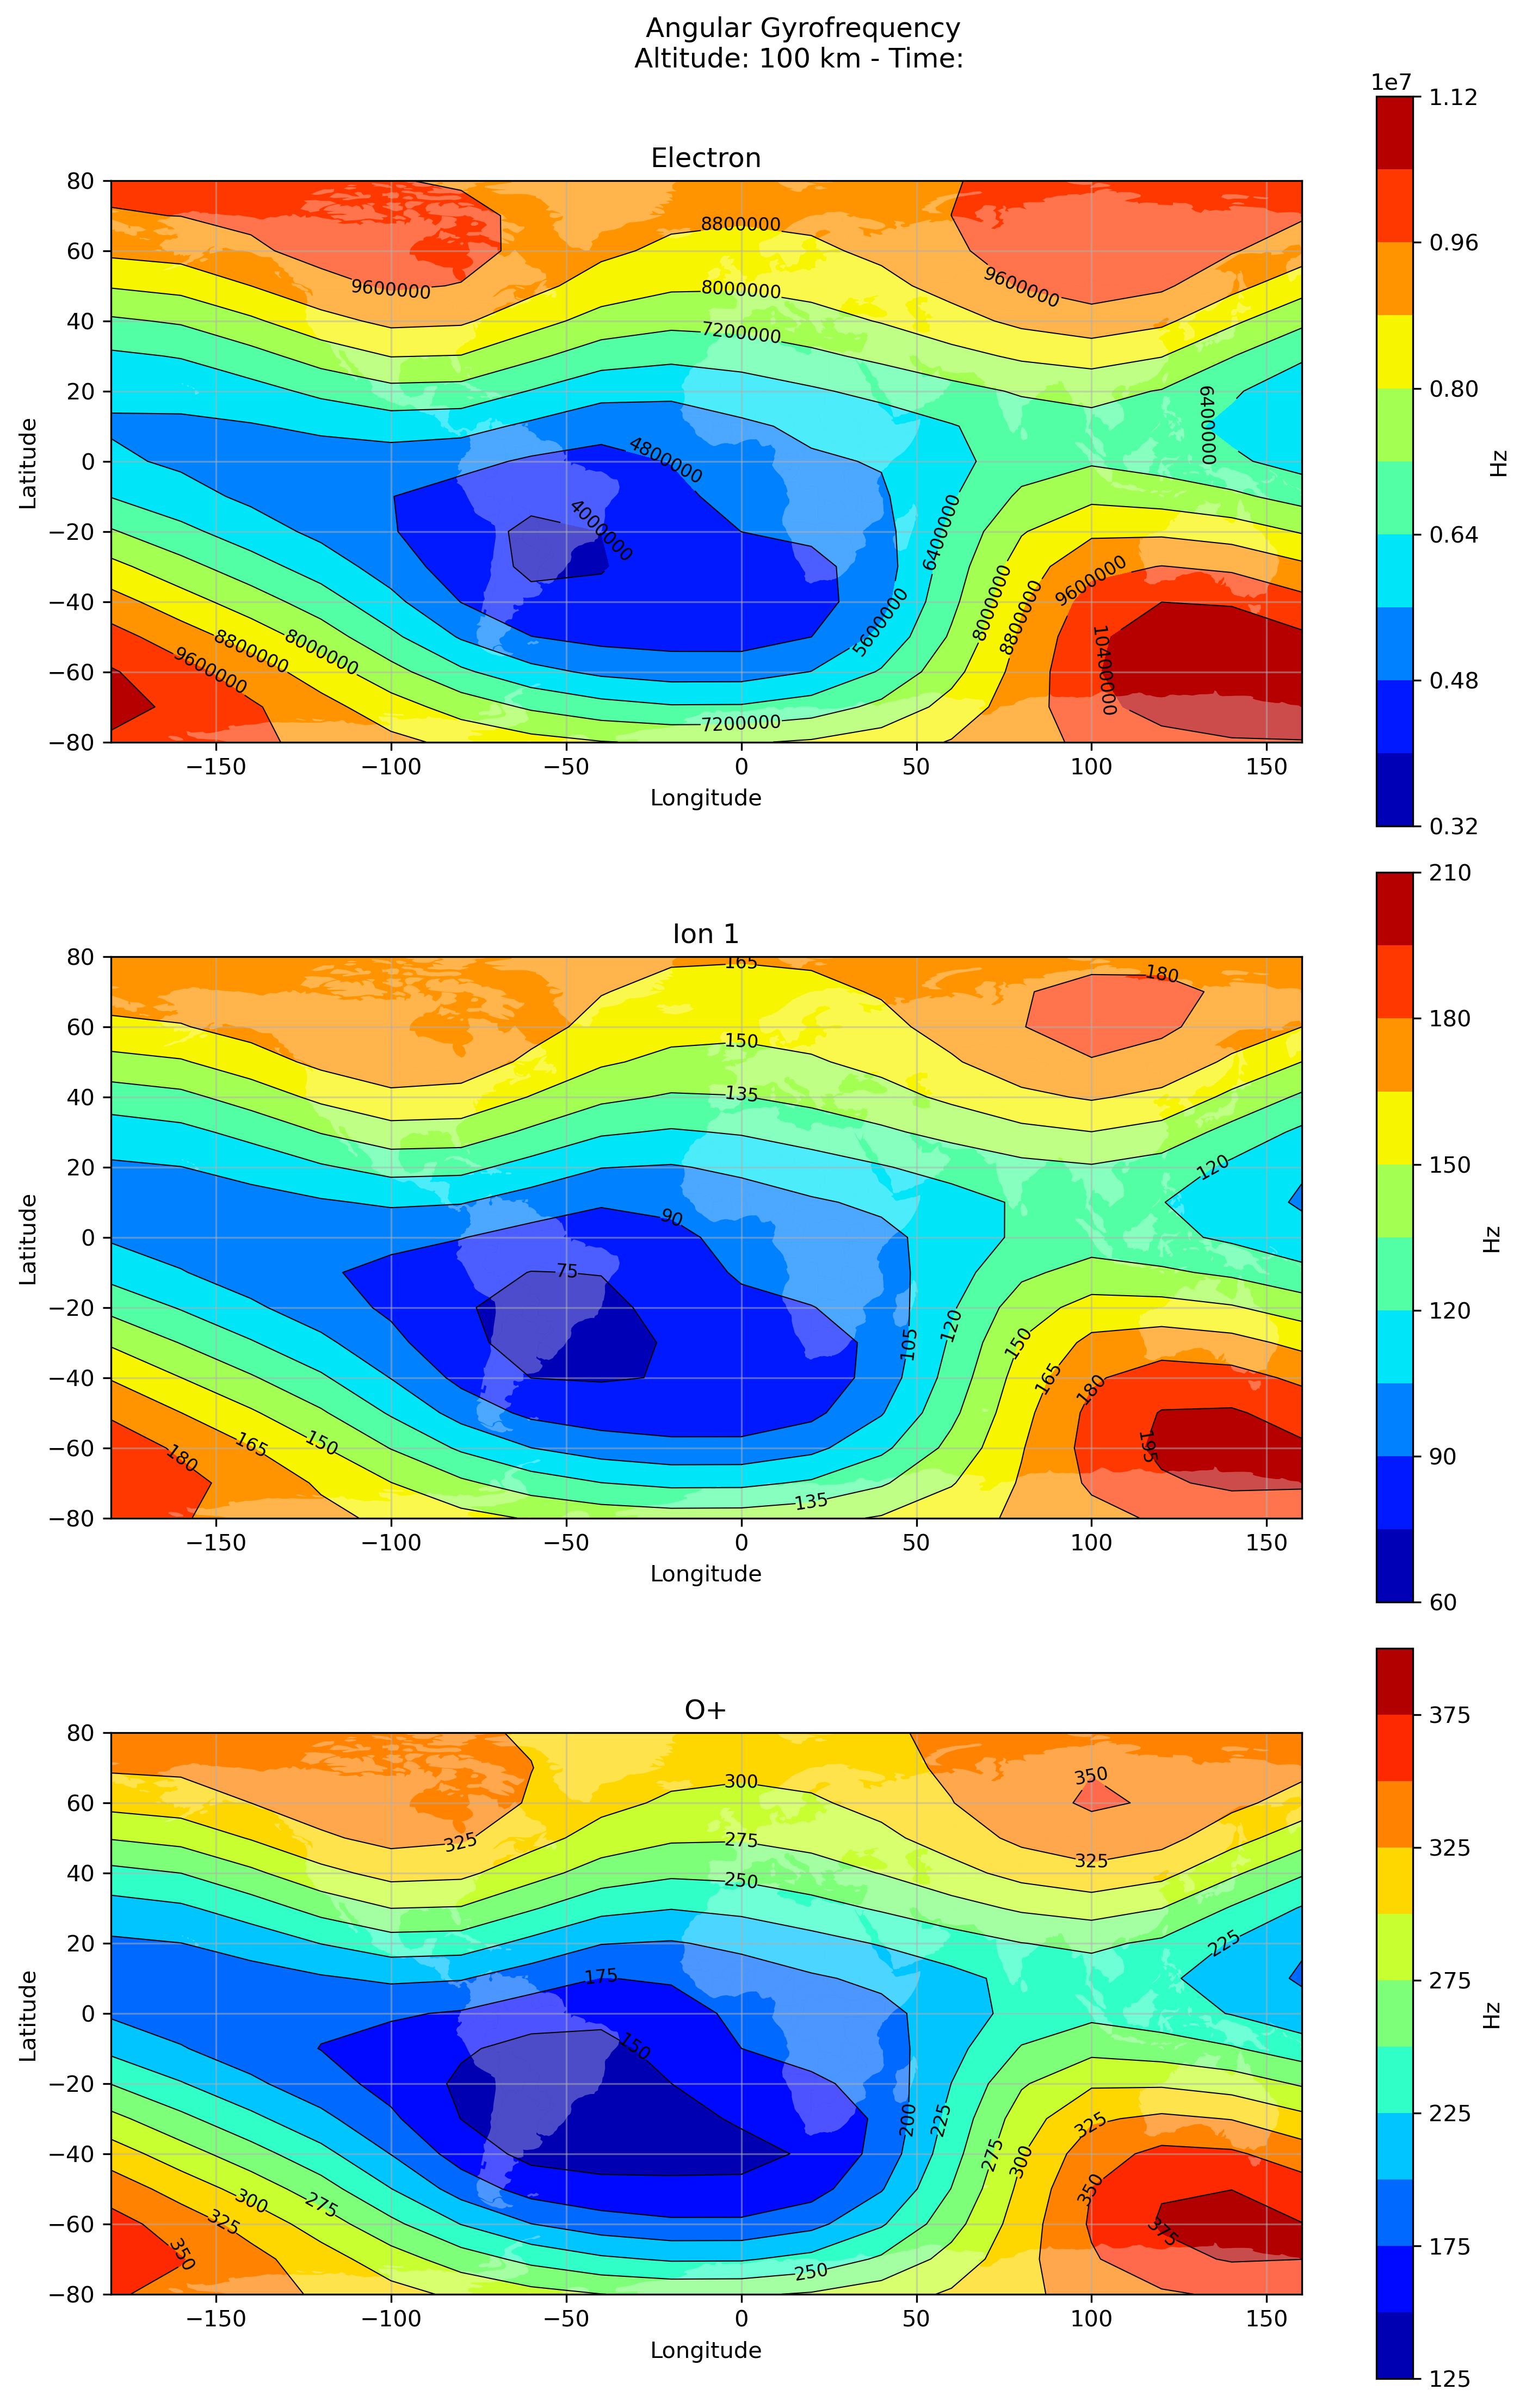

In [33]:
when = "0 days 00:00:00"
h = 100
gyrofreq.plot_gyrmap(gyrofreq.result,h=h, localscope=True, savemap = True,filename="gyrofrequency_clara_teste")

In [34]:
gyrofreq.result

we         wi1         wi2
ht    lat   lon                                        
100.0 -80.0 0.0    1.026896e+07  184.686988  352.066087
            20.0   1.005710e+07  180.876687  344.802566
            40.0   9.754655e+06  175.437217  334.433385
            60.0   9.388836e+06  168.857966  321.891455
            80.0   8.992655e+06  161.732656  308.308583
...                         ...         ...         ...
480.0  80.0 260.0  8.273699e+06  148.802251  283.659542
            280.0  8.341833e+06  150.027639  285.995481
            300.0  8.360026e+06  150.354847  286.619232
            320.0  8.336816e+06  149.937420  285.823498
            340.0  8.297310e+06  149.226893  284.469029

[6120 rows x 3 columns]

In [35]:
conductivity.plot_2dgrid(conductivity.CondH,h,'Hall Conductivity at ' + str(h) + " km altitude\n" + time)

NameError: name 'time' is not defined